# Project: Investigating Fertility Rates Across Countries of the World
### Course: Udacity, Data Analyst Nanodegree
### Date: June 2020
### Author: Brian Allan Woodcock
### Email: brianwoodcock99@gmail.com

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Gapminder (<https://www.gapminder.org>) is an organization, founded by the Swedish academic Hans Rosling and dedicated to educating people about basic global facts, such as facts about the distribution of human population and income across the countries of the world.  For promoting a fact-based worldview, Gapminder provides various educational resources as well as data sets for investigating global trends related to a wide variety of factors.

This investigation will look at fertility rates -- i.e., children per woman, or as Gapminder designates it "babies per woman" -- across the world.  The fertility rate for a country is the average number of children born per woman and estimates are made by considering the number of children that would be born to each woman with prevailing age-specific fertility rates.  The data set extends from 1800 to 2100. The period 1800-2014 consists of data compiled by Gapminder and combined with UN data. From 2015 onward, values come from the UN forecast of future fertility rate in all countries.  Gapminder's documentation for this data set can be accessed here: <https://www.gapminder.org/data/documentation/gd008/>.

In some of his videos, Hans Rosling addresses the questions, ["Will saving poor children lead to overpopulation?"](https://vimeo.com/122112096) and ["The rapid growth of the world population, when will it slow down?"](https://vimeo.com/127513974)  Decreasing fertility rates play a role in both of his answers.  In the past, human fertility rates were about 6 children per woman, but mortality rates were also very high.  Now, according to Rosling, it's only in the poor countries of the world that fertility rates are still high at about 5 children per woman.  In the majority of countries, fertility rates have dropped to nearly 2 children per woman. According to Rosling, UN forecasts for the end of this century (2100) extrapolate that the human population will stop growing at about 11 billion, a change of about 4 billion from the current, roughly 7 billion people in the world.  So, understanding fertility rates is a key factor in addressing some big questions about world population.

Using Gapminder's data, we will investigate the following questions:

> **Question 1**: How have fertility rates across countries of the world changed over time?

> **Question 2**: How have fertility rates been distributed across regions of the world recently (2011)?

> **Question 3**: Are fertility rates (2011) correlated with other factors -- for example, income, life expectancy, sanitation, female literacy, female employment, and contraceptive use -- and, if so, how -- positively or negatively?  (Answers to this last question would form the basis for further work in developing regression models and investigating questions of causality.  But that goes beyond the goals of this exploratory data analysis.)

The year 2011 has been chosen as a "current" year for our analysis.  Why is that?  Some of the relevant data sets for question 3, such as that concerning female literacy, do not have data beyond 2011.  Others, have data beyond 2011, but not all the way to the present year.  For example, the fertility rate data set switches from historical data to forecasted data after 2014.  So, we do not have historical data even for fertility rate up to the present year from Gapminder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### Data Frame - Fertility Rate Over Time

First, we load the data set that has fertility rate information for countries over time.

In [2]:
df_fertility = pd.read_csv('children_per_woman_total_fertility.csv', index_col='country')
df_fertility.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


Are there missing values in this data set?  According to the following, the answer is "No".

In [3]:
df_fertility.isnull().sum().sum()

0

The fertility data becomes prospective after 2014 and, hence, data after that year is not useful for answering our questions.  So, we will work with a reduced subset of the data set only including data to 2014.

In [4]:
df_fertility_to2014 = df_fertility.loc[:, '1800' : '2014']
df_fertility_to2014.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.83,6.65,6.46,6.25,6.04,5.82,5.60,5.38,5.17,4.98
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.75,1.70,1.67,1.65,1.65,1.65,1.67,1.69,1.70,1.71
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.50,2.58,2.66,2.75,2.83,2.89,2.93,2.94,2.92,2.89
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.47,6.42,6.37,6.31,6.24,6.16,6.08,6.00,5.92,5.84
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.22,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08


In [5]:
df_fertility_to2014.shape

(184, 215)

Country names constitutes our row index, and our data table has 184 rows.  So, our data includes 184 countries.

We would like to include regional categories in our data set.  For that, we need to acquire the categories and merge that with our data set.  We can obtain that from Gapminder, but not in the usual data set location.  One must look in the place where Gapminder describes how to use their data visualization tools offline and how to combine their data with one's own.  They provide a table that is intended to help with mapping to their data: <https://vizabi.org/tutorials/2017/04/04/join-your-data-with-g/>  This has what we need.  We will use their division of the world into 6 regions (`world_6region`) instead of their division into just 4 (`world_4region`).

In [6]:
df_countries = pd.read_csv('ddf--entities--geo--country.csv', index_col='name')
df_countries.head()

,country,gwid,world_6region,income_groups,landlocked,g77_and_oecd_countries,main_religion_2008,gapminder_list,alternative_1,alternative_2,...,arb2,arb3,arb4,arb5,arb6,is--country,un_state,world_4region,latitude,longitude
name,,,,,,,,,,,,,,,,,,,,,
Abkhazia,abkh,i0,europe_central_asia,NaN,NaN,others,NaN,Abkhazia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,europe,NaN,NaN
Afghanistan,afg,i1,south_asia,low_income,landlocked,g77,muslim,Afghanistan,Islamic Republic of Afghanistan,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,asia,33.00,66.0
Akrotiri and Dhekelia,akr_a_dhe,i2,europe_central_asia,NaN,coastline,others,NaN,Akrotiri and Dhekelia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,europe,NaN,NaN
Åland,ala,i258,europe_central_asia,NaN,coastline,others,NaN,Åland,√Öland,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,europe,60.25,20.0
Albania,alb,i3,europe_central_asia,upper_middle_income,coastline,others,muslim,Albania,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,europe,41.00,20.0


In [7]:
df_countries = df_countries['world_6region']
df_countries.head()

name
Abkhazia                 europe_central_asia
Afghanistan                       south_asia
Akrotiri and Dhekelia    europe_central_asia
Åland                    europe_central_asia
Albania                  europe_central_asia
Name: world_6region, dtype: object

In [8]:
df_countries.shape

(273,)

We expect that the list of countries in `df_fertility_to2014` is a proper subset of the total list of countries in `df_countries`, but we should check that there aren't any country names in the former that are not in the latter.

In [9]:
df_fertility.index.difference(df_countries.index)    # Return set difference: index1 - index2

Index(['North Macedonia'], dtype='object')

The check leads us to realize that 'North Macedonia' shows up as a country index in the fertility data frame but does not show up in the total countries list.  Does it have a different name in the total countries list?

In [10]:
ctry_index = df_countries.index.to_list()
[i for i in ctry_index if 'Macedonia' in i]

['Macedonia, FYR']

It appears that 'North Macedonia' occurs in the total countries list under a different name.  There, it is called 'Macedonia, FYR' where 'FYR' appears to refer to "Former Yugoslav Republic".  A check on Wikipedia, looking at 'North Macedonia', confirms that these two are the same country.

So, we change the name in the countries list to 'North Macedonia' in keeping with the fertility data frame index.

In [11]:
df_countries.rename(index={'Macedonia, FYR': 'North Macedonia'}, inplace=True)
df_countries.loc['North Macedonia']

'europe_central_asia'

We merge the two data frames so as to include the region data with the fertility data.

In [12]:
df_fertility_to2014 = pd.merge(df_fertility_to2014, df_countries.rename('regions'), how='inner', left_index=True, right_index=True)
df_fertility_to2014.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,regions
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.65,6.46,6.25,6.04,5.82,5.60,5.38,5.17,4.98,south_asia
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.70,1.67,1.65,1.65,1.65,1.67,1.69,1.70,1.71,europe_central_asia
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.75,2.83,2.89,2.93,2.94,2.92,2.89,middle_east_north_africa
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.42,6.37,6.31,6.24,6.16,6.08,6.00,5.92,5.84,sub_saharan_africa
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08,america


In [13]:
df_fertility_to2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Columns: 216 entries, 1800 to regions
dtypes: float64(215), object(1)
memory usage: 311.9+ KB


### Data Frame - 2011 Fertility Rate and Other Variables

Now, we will create a data frame focused on a "current" year.  We choose 2011.  Our reasons for that choice were explained in the introduction.

In [14]:
df_2011 = df_fertility_to2014[['2011', 'regions']].rename(columns = {'2011':'fertility_rate'})
df_2011.head()

,fertility_rate,regions
Afghanistan,5.60,south_asia
Albania,1.67,europe_central_asia
Algeria,2.93,middle_east_north_africa
Angola,6.08,sub_saharan_africa
Antigua and Barbuda,2.12,america


To answer question 3, we will need to compare fertility rate with other factors -- in particular, income, life expectancy, sanitation, female literacy, female employment, and contraceptive use.  We will add these factors one-by-one to the data frame.

#### Income: GDP per capita, constant PPP dollars
Gapminder description: "GDP per capita measures the value of everything produced in a country during a year, divided by the number of people. The unit is in international dollars, fixed 2011 prices. The data is adjusted for inflation and differences in the cost of living between countries, so-called PPP dollars."

The end of the time series, between 1990 and 2018, uses the GDP per capita data from the World Bank, published in July 2019 in their World Development Indicators. The data set extends from 1800 to 2040.

Gapminder's documentation: https://www.gapminder.org/data/documentation/gd001/

In [15]:
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col='country')['2011']
df_income.rename('income', inplace=True).head()

country
Afghanistan     1630
Albania        10200
Algeria        13000
Andorra        42000
Angola          6350
Name: income, dtype: int64

We create a function we will use to summarize basic information about the variable data we are interested in.

In [16]:
def dsummary(df):
    message = 'The data set for this variable includes {num} countries and there are {null} null values.'.format(num=len(df), null=df.isnull().sum())
    print(message)

In [17]:
dsummary(df_income)

The data set for this variable includes 193 countries and there are 0 null values.


In [18]:
df_2011 = pd.merge(df_2011, df_income, how='inner', left_index=True, right_index=True)
df_2011.head()

,fertility_rate,regions,income
Afghanistan,5.60,south_asia,1630
Albania,1.67,europe_central_asia,10200
Algeria,2.93,middle_east_north_africa,13000
Angola,6.08,sub_saharan_africa,6350
Antigua and Barbuda,2.12,america,20000


In [19]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fertility_rate  184 non-null    float64
 1   regions         184 non-null    object 
 2   income          184 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


#### Life Expectancy (years)
Gapminder description: "The average number of years a newborn child would live if current mortality patterns were to stay the same."

The data set extends from 1800 to 2100 so future years involve projections.

Documentation: <https://www.gapminder.org/data/documentation/gd004/>

In [20]:
df_life_expect = pd.read_csv('life_expectancy_years.csv', index_col = 'country')['2011']
df_life_expect.rename('life_expect', inplace=True).head()

country
Afghanistan    60.4
Albania        77.7
Algeria        76.5
Andorra        82.4
Angola         60.6
Name: life_expect, dtype: float64

In [21]:
dsummary(df_life_expect)

The data set for this variable includes 187 countries and there are 0 null values.


In [22]:
df_2011 = pd.merge(df_2011, df_life_expect, how='inner', left_index=True, right_index=True)
df_2011.head()

,fertility_rate,regions,income,life_expect
Afghanistan,5.60,south_asia,1630,60.4
Albania,1.67,europe_central_asia,10200,77.7
Algeria,2.93,middle_east_north_africa,13000,76.5
Angola,6.08,sub_saharan_africa,6350,60.6
Antigua and Barbuda,2.12,america,20000,76.7


In [23]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fertility_rate  184 non-null    float64
 1   regions         184 non-null    object 
 2   income          184 non-null    int64  
 3   life_expect     184 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


#### Sanitation: At least basic sanitation, overall access (%)
Gapminder description: "The percentage of people using at least basic sanitation services, that is, improved sanitation facilities that are not shared with other households.  This indicator encompasses both people using basic sanitation services as well as those using safely managed sanitation services. Improved sanitation facilities include flush/pour flush to piped sewer systems, septic tanks or pit latrines; ventilated improved pit latrines, compositing toilets or pit latrines with slabs."

The data set extends from 2000 to 2017.

Gapminder's data source: <https://data.worldbank.org/indicator/SH.STA.SMSS.ZS>

In [24]:
df_sanitation = pd.read_csv('at_least_basic_sanitation_overall_access_percent.csv', index_col= 'country')['2011']
df_sanitation.rename('sanitation', inplace=True).head()

country
Afghanistan    0.355
Albania        0.962
Algeria        0.868
Andorra        1.000
Angola         0.423
Name: sanitation, dtype: float64

In [25]:
dsummary(df_sanitation)

The data set for this variable includes 194 countries and there are 0 null values.


In [26]:
df_2011 = pd.merge(df_2011, df_sanitation, how='inner', left_index=True, right_index=True)
df_2011.head()

,fertility_rate,regions,income,life_expect,sanitation
Afghanistan,5.60,south_asia,1630,60.4,0.355
Albania,1.67,europe_central_asia,10200,77.7,0.962
Algeria,2.93,middle_east_north_africa,13000,76.5,0.868
Angola,6.08,sub_saharan_africa,6350,60.6,0.423
Antigua and Barbuda,2.12,america,20000,76.7,0.867


In [27]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fertility_rate  184 non-null    float64
 1   regions         184 non-null    object 
 2   income          184 non-null    int64  
 3   life_expect     184 non-null    float64
 4   sanitation      184 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.6+ KB


#### Female Literacy: Literacy rate, adult female (% of females ages 15 and above)
Gapminder description: "Adult literacy rate is the percentage of people ages 15 and above who can, with understanding, read and write a short, simple statement on their everyday life." 

The data set extends from 1975 to 2011.

Gapminder's data source: <http://data.uis.unesco.org/>. Choose 'Education/Literacy/Literacy rate' in the lefthand menu.  Then select the correct data set from the dropdown menu in the table.

In [28]:
df_literacy = pd.read_csv('literacy_rate_adult_female_percent_of_females_ages_15_above.csv', index_col = 'country')['2011']
df_literacy.head()

country
Afghanistan            13.0
Albania                95.7
Algeria                 NaN
Angola                 58.6
Antigua and Barbuda    99.4
Name: 2011, dtype: float64

In [29]:
dsummary(df_literacy)

The data set for this variable includes 150 countries and there are 70 null values.


The female literacy variable contains a lot of null values (70) for 2011.  Probably not every country is evaluated, or measured, each year.  Female literacy should not change appreciably over a few years.  So, we will use the mean value over the extant data for the 5-years 2007-2011, thereby wrapping in any data available over that 5 year period.

In [30]:
df_literacy = pd.read_csv('literacy_rate_adult_female_percent_of_females_ages_15_above.csv', index_col = 'country')[['2007','2008','2009','2010','2011']].mean(axis=1).rename('f_literacy')
df_literacy.head()

country
Afghanistan            13.0
Albania                95.2
Algeria                 NaN
Angola                 58.6
Antigua and Barbuda    99.4
Name: f_literacy, dtype: float64

In [31]:
dsummary(df_literacy)

The data set for this variable includes 150 countries and there are 16 null values.


We see that we have substantially reduced the number of null values from 70 to 16 by this 5 year averaging approach.

In [32]:
df_2011 = pd.merge(df_2011, df_literacy, how='left', left_index=True, right_index=True)
df_2011.head()

,fertility_rate,regions,income,life_expect,sanitation,f_literacy
Afghanistan,5.60,south_asia,1630,60.4,0.355,13.0
Albania,1.67,europe_central_asia,10200,77.7,0.962,95.2
Algeria,2.93,middle_east_north_africa,13000,76.5,0.868,NaN
Angola,6.08,sub_saharan_africa,6350,60.6,0.423,58.6
Antigua and Barbuda,2.12,america,20000,76.7,0.867,99.4


In [33]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fertility_rate  184 non-null    float64
 1   regions         184 non-null    object 
 2   income          184 non-null    int64  
 3   life_expect     184 non-null    float64
 4   sanitation      184 non-null    float64
 5   f_literacy      134 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 15.1+ KB


#### Female Employment: Labour force participation rate (%), females aged 15+
Gapminder description: "For age group 15+, percentage of female labour to total female population."

The data set extends from 1990 to 2030.

Gapminder's data source: <https://ilostat.ilo.org/data/>

In [34]:
df_employment = pd.read_csv('females_aged_15plus_labour_force_participation_rate_percent.csv', index_col='country')['2011']
df_employment.rename('f_employment', inplace=True).head()

country
Afghanistan    0.153
Albania        0.471
Algeria        0.152
Angola         0.753
Argentina      0.481
Name: f_employment, dtype: float64

In [35]:
dsummary(df_employment)

The data set for this variable includes 179 countries and there are 0 null values.


In [36]:
df_2011 = pd.merge(df_2011, df_employment, how='left', left_index=True, right_index=True)
df_2011.head()

,fertility_rate,regions,income,life_expect,sanitation,f_literacy,f_employment
Afghanistan,5.60,south_asia,1630,60.4,0.355,13.0,0.153
Albania,1.67,europe_central_asia,10200,77.7,0.962,95.2,0.471
Algeria,2.93,middle_east_north_africa,13000,76.5,0.868,NaN,0.152
Angola,6.08,sub_saharan_africa,6350,60.6,0.423,58.6,0.753
Antigua and Barbuda,2.12,america,20000,76.7,0.867,99.4,NaN


In [37]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fertility_rate  184 non-null    float64
 1   regions         184 non-null    object 
 2   income          184 non-null    int64  
 3   life_expect     184 non-null    float64
 4   sanitation      184 non-null    float64
 5   f_literacy      134 non-null    float64
 6   f_employment    179 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 16.5+ KB


#### Contraceptive Use (% of women ages 15 to 49)
Gapminder description: "Contraceptive prevalence rate is the percentage of women who are practicing, or whose sexual partners are practicing, any form of contraception.  It is usually measured for women ages 15-49 who are married or in a union."

The data set extends from 1961 to 2018.

Gapminder's data source: <https://data.worldbank.org/indicator/SP.DYN.CONU.ZS>

In [38]:
df_contraception = pd.read_csv('contraceptive_use_percent_of_women_ages_15_49.csv', index_col='country')['2011']
df_contraception.rename('contraception', inplace=True).head()

country
Afghanistan            0.212
Albania                  NaN
Algeria                  NaN
Angola                   NaN
Antigua and Barbuda      NaN
Name: contraception, dtype: float64

In [39]:
dsummary(df_contraception)

The data set for this variable includes 185 countries and there are 153 null values.


There are a lot of null values in this data -- 153 for the year 2011.  We will use the same strategy as we did with female literacy in order to reduce this number.  That is, we will use the mean value over the extant data for the 5-years 2007-2011, thereby wrapping in the available data over that 5 year period.  This seems justified since contraceptive use is unlikely to change appreciably over a five year period and the data gaps probably result from spotty reporting/measuring in countries.

In [40]:
df_contraception = pd.read_csv('contraceptive_use_percent_of_women_ages_15_49.csv', index_col='country')[['2007', '2008', '2009', '2010', '2011']].mean(axis=1).rename('contraception')
df_contraception.head()

country
Afghanistan            0.219333
Albania                0.693000
Algeria                     NaN
Angola                 0.177000
Antigua and Barbuda         NaN
Name: contraception, dtype: float64

In [41]:
dsummary(df_contraception)

The data set for this variable includes 185 countries and there are 61 null values.


There are still 61 null values, but this is a lot less than the 153 encountered originally.  Overall, there are 185 - 61 = 124 non-null values, which is large enough for showing trends.

In [42]:
df_2011 = pd.merge(df_2011, df_contraception, how='left', left_index=True, right_index=True)
df_2011.head()

,fertility_rate,regions,income,life_expect,sanitation,f_literacy,f_employment,contraception
Afghanistan,5.60,south_asia,1630,60.4,0.355,13.0,0.153,0.219333
Albania,1.67,europe_central_asia,10200,77.7,0.962,95.2,0.471,0.693000
Algeria,2.93,middle_east_north_africa,13000,76.5,0.868,NaN,0.152,NaN
Angola,6.08,sub_saharan_africa,6350,60.6,0.423,58.6,0.753,0.177000
Antigua and Barbuda,2.12,america,20000,76.7,0.867,99.4,NaN,NaN


In [43]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fertility_rate  184 non-null    float64
 1   regions         184 non-null    object 
 2   income          184 non-null    int64  
 3   life_expect     184 non-null    float64
 4   sanitation      184 non-null    float64
 5   f_literacy      134 non-null    float64
 6   f_employment    179 non-null    float64
 7   contraception   119 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 17.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: How have fertility rates across countries of the world changed over time?

First, let's look at how fertility rates have changed over time.  To do this, we look at boxplots at 10-year time intervals -- so, from 1801 to 2011 in 10-year increments.

In [44]:
df_fertility_filtered = df_fertility_to2014.filter(regex='[1]$')
df_fertility_filtered.head()

,1801,1811,1821,1831,1841,1851,1861,1871,1881,1891,...,1921,1931,1941,1951,1961,1971,1981,1991,2001,2011
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,7.00,7.16,7.40,7.56,7.45,7.45,7.45,7.48,7.39,5.60
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,4.60,3.54,3.77,5.97,6.40,4.78,3.53,2.91,2.07,1.67
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,6.99,7.15,7.37,7.47,7.57,7.62,6.62,4.48,2.44,2.93
Angola,6.93,6.94,6.95,6.95,6.96,6.97,6.97,6.98,6.99,7.00,...,7.02,7.00,7.02,7.13,7.52,7.60,7.47,7.19,6.60,6.08
Antigua and Barbuda,5.00,4.96,4.92,4.89,4.85,4.81,4.77,4.74,4.70,4.66,...,4.55,4.52,4.48,4.46,4.39,3.52,2.10,2.07,2.31,2.12


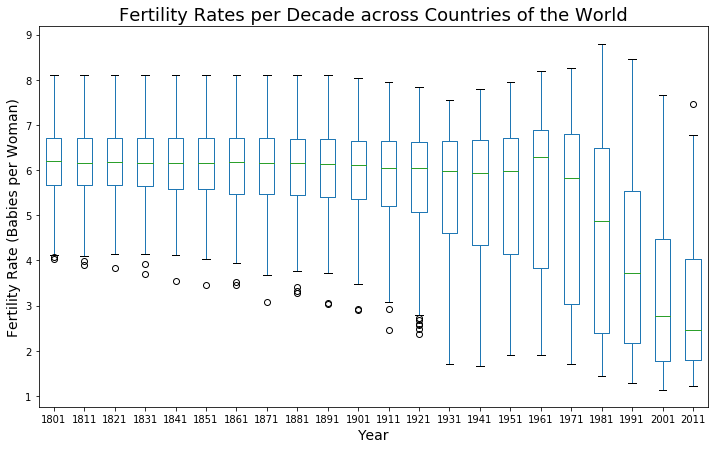

In [45]:
df_fertility_filtered.plot(kind='box', figsize = (12,7))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fertility Rate (Babies per Woman)', fontsize=14)
plt.title('Fertility Rates per Decade across Countries of the World', fontsize=18);

What do we see here?

* Median fertility rates in the past, as illustrated throughout the 19th century, were roughly about 6 children per woman with variation from about 4 to 8.

* Around the turn of the 20th century, there are some countries that begin to have decreasing fertility rates, thereby stretching out the boxplot.  Overall, a longer boxplot corresponds to a greater degree of variation across countries of the world.  This is the pattern in the 20th century.

* Around 1961, there is a slight "uptick" in fertility rates.  Then there is a marked decrease so that by 2011 the median among countries is between 2 and 3.

### Question 2: How have fertility rates been distributed across regions of the world recently (2011)?

First, let us look at a histogram to show the distribution of fertility rates (babies per woman) across countries of the world.

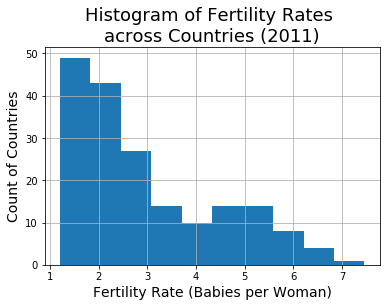

In [46]:
df_2011.fertility_rate.hist()
plt.xlabel('Fertility Rate (Babies per Woman)', fontsize=14)
plt.ylabel('Count of Countries', fontsize=14)
plt.title('Histogram of Fertility Rates \nacross Countries (2011)', fontsize=18);

The majority of countries have fertility rates below 4.  There appears to be a second peak around 5.

Using both a table and a bar chart, we can examine regions of the world looking at averages of fertility rates across the countries in those regions.

In [47]:
df_regions = df_2011.groupby(by='regions').mean()['fertility_rate']
df_regions

regions
america                     2.280606
east_asia_pacific           2.735385
europe_central_asia         1.737347
middle_east_north_africa    2.856500
south_asia                  2.920000
sub_saharan_africa          4.855417
Name: fertility_rate, dtype: float64

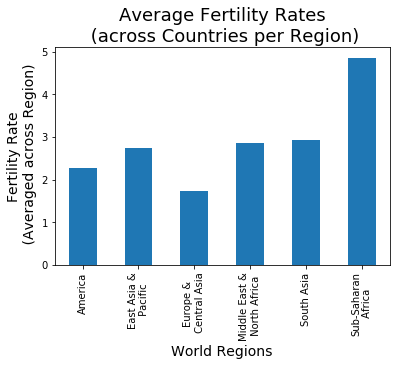

In [48]:
df_regions.plot(kind="bar")
plt.xlabel('World Regions', fontsize=14)
plt.ylabel('Fertility Rate\n (Averaged across Region)', fontsize=14)
plt.title('Average Fertility Rates\n (across Countries per Region)', fontsize=18)
x = [0, 1, 2, 3, 4, 5]
names = ['America', 'East Asia &\n Pacific', 'Europe &\n Central Asia', 'Middle East &\n North Africa', 'South Asia', 'Sub-Saharan\n Africa']
plt.xticks(ticks=x, labels=names);

The region with the highest fertility rates (babies per woman) is Sub-Saharan Africa, with a mean across the region of nearly 5.

To see the distribution among countries in the various regions we can use boxplots.

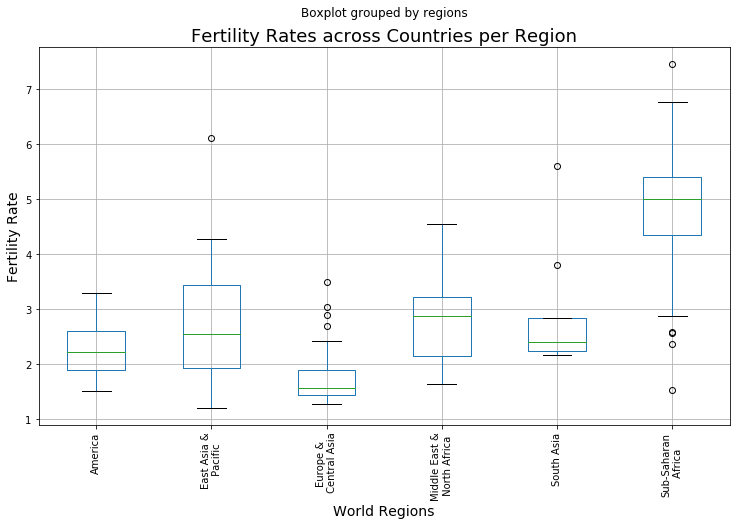

In [49]:
df_2011[['fertility_rate', 'regions']].boxplot(by='regions', figsize=(12,7))
plt.xlabel('World Regions', fontsize=14)
plt.ylabel('Fertility Rate', fontsize=14)
plt.title('Fertility Rates across Countries per Region', fontsize=18)
x = [1, 2, 3, 4, 5, 6]
names = ['America', 'East Asia &\n Pacific', 'Europe &\n Central Asia', 'Middle East &\n North Africa', 'South Asia', 'Sub-Saharan\n Africa']
plt.xticks(ticks=x, labels=names, rotation='vertical');

### Question 3: Are fertility rates (2011) correlated with other factors -- in particular, income, life expectancy, sanitation, female literacy, female employment, and contraceptive use?  And, if so, how -- positively or negatively?

#### Fertility rate vs income

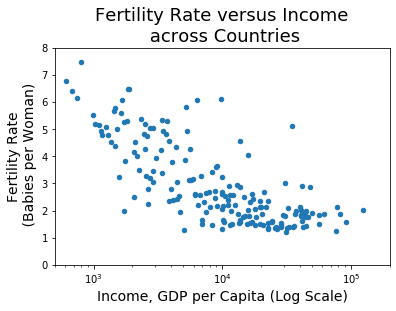

In [50]:
df_2011.plot(x='income', y='fertility_rate', kind='scatter', logx=True)
plt.axis([500,200000,0,8])
plt.xlabel('Income, GDP per Capita (Log Scale)', fontsize=14)
plt.ylabel('Fertility Rate\n (Babies per Woman)', fontsize=14)
plt.title('Fertility Rate versus Income\n across Countries', fontsize=18);

Income (GDP per capita, adjusted for inflation and cost of living) was plotted on a logarithmic scale to better see the spread of the data points.  Clearly, there is a negative correlation between fertility rate and income.  Lower income per country corresponds with a higher fertility rate.  As income increases, fertility rates appear to hit a floor where higher incomes seem to make little difference.

#### Fertility rate vs life expectancy

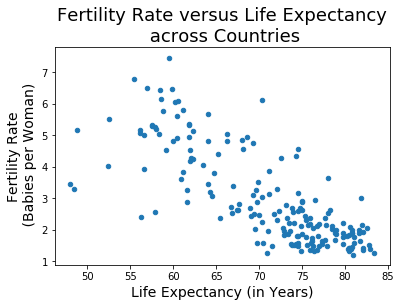

In [51]:
df_2011.plot(x='life_expect', y='fertility_rate', kind='scatter')
plt.xlabel('Life Expectancy (in Years)', fontsize=14)
plt.ylabel('Fertility Rate\n (Babies per Woman)', fontsize=14)
plt.title('Fertility Rate versus Life Expectancy\n across Countries', fontsize=18);

There is clearly a negative correlation between fertility rate and life expectancy (in years).  Countries with higher life expectancies have lower fertility rates.

#### Fertility rate vs sanitation

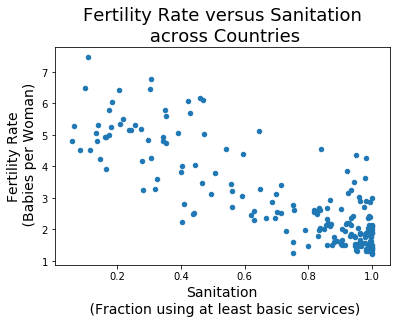

In [52]:
df_2011.plot(x='sanitation', y='fertility_rate', kind='scatter')
plt.xlabel('Sanitation\n (Fraction using at least basic services)', fontsize=14)
plt.ylabel('Fertility Rate\n (Babies per Woman)', fontsize=14)
plt.title('Fertility Rate versus Sanitation\n across Countries', fontsize=18);

Sanitation is clearly negatively correlated with fertility rate.

#### Fertility rate vs female literacy

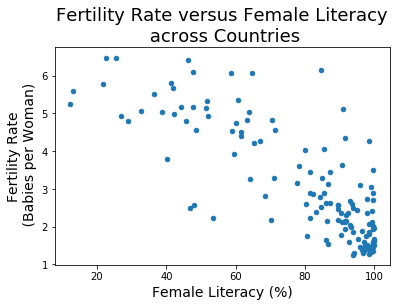

In [53]:
df_2011.plot(x='f_literacy', y='fertility_rate', kind='scatter')
plt.xlabel('Female Literacy (%)', fontsize=14)
plt.ylabel('Fertility Rate\n (Babies per Woman)', fontsize=14)
plt.title('Fertility Rate versus Female Literacy\n across Countries', fontsize=18);

There is a negative correlation between fertility rate and female literacy, a variable connected with female education.

#### Fertility rate vs female employment

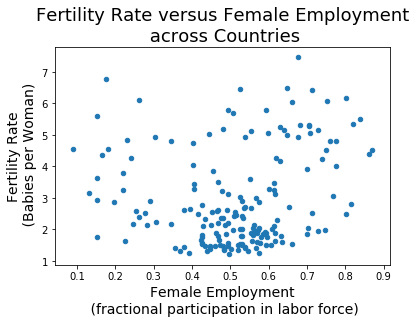

In [54]:
df_2011.plot(x='f_employment', y='fertility_rate', kind='scatter')
plt.xlabel('Female Employment\n (fractional participation in labor force)', fontsize=14)
plt.ylabel('Fertility Rate\n (Babies per Woman)', fontsize=14)
plt.title('Fertility Rate versus Female Employment\n across Countries', fontsize=18);

Fertility rate and female employment (the percentage participation in the labor force for females aged 15+) appear to be uncorrelated.

#### Fertility rate vs contraceptive use

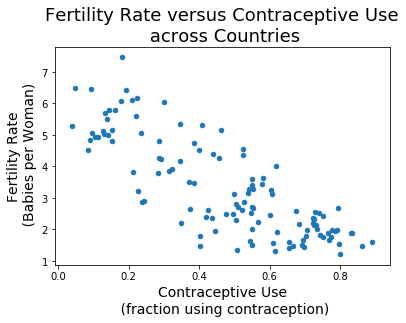

In [55]:
df_2011.plot(x='contraception', y='fertility_rate', kind='scatter')
plt.xlabel('Contraceptive Use\n (fraction using contraception)', fontsize=14)
plt.ylabel('Fertility Rate\n (Babies per Woman)', fontsize=14)
plt.title('Fertility Rate versus Contraceptive Use\n across Countries', fontsize=18);

The contraception use variable aims to be a measure of the percentage of women who are practicing, or whose sexual partners are practicing, any form of contraception.  There is a clear negative correlation between fertility rate and contraceptive use.

For the previous variables in which there was a negative correlation with fertility rate, one should hesitate to draw any conclusions about causation without further investigation.  In this case, our background knowledge that the use of contraceptives in individual cases directly prevents pregnancy -- that is, our knowledge of some related causal facts -- leads us to expect a negative correlation and, in this case, the negative correlation seems to confirm the presence of underlying causation.

<a id='conclusions'></a>
## Conclusions

We have seen that, in answer to Question 1, fertility rates (babies per woman) across countries have been decreasing over time, tending toward rates between 2 and 3 children per woman.  Morever, we have seen that, in answer to Question 2, the mean of fertility rates in regions of the world (averaged over the countries in those regions) is for most regions (the Americas, East Asia & the Pacific, the Middle East & North Africa, and South Asia) between 2 and 3. The mean of fertility rates in Europe and Central Asia is the lowest, being less than 2.  The greatest exception is Sub-Saharan Africa where the mean of fertility rates across those countries is just under 5.

When comparing fertility rates with other variables, in answer to Question 3, we observed that fertility rates are negatively correlated with income (GDP per capita), life expectancy, sanitation, female literacy, and contraceptive use.  One might think that fertility rates would also be correlated with the percentage of females that have joined the work force, but that was not observed.  

### Limitations

We chose 2011 as the year to use in order to compare fertility rates with other variables in answer to question 3.  We did so because some data sets (e.g., female literacy) did not have data beyond that year.  However, 2011 is now nearly a decade ago.  One might try to pursue more current data outside of that provided by Gapminder.

In two cases (the variables female literacy and contraceptive use), we used 5-year averages (2007-2011) to fill in data for 2011 since, for those cases, so much data was missing for 2011 strictly on its own.  This seems justified because one wouldn't expect great changes over a 5-year period for these variables, but more work could be done to try to support that expectation.

In addition, one should be careful not to infer causation from the correlations we observed.  Correlations may be the result of a common cause which produces both results as joint effects.  This work on correlations could form the basis for further work creating regression models and investigating questions about causation.